In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
## Read the dataset
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

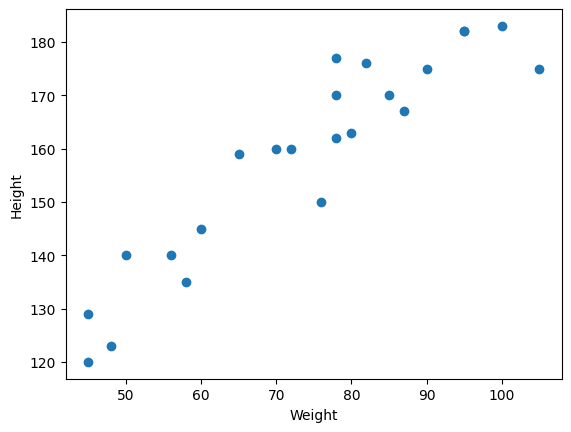

In [4]:
## plot the data
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
## divide our dataset into independ and dependent features
X = df[['Weight']] ##independent feaures
y = df['Height'] ## dependent features

In [6]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [7]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [8]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
X.shape

(23, 1)

In [10]:
X_train.shape, X_train.shape, y_train.shape, y_test.shape

((18, 1), (18, 1), (18,), (5,))

In [11]:
## Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

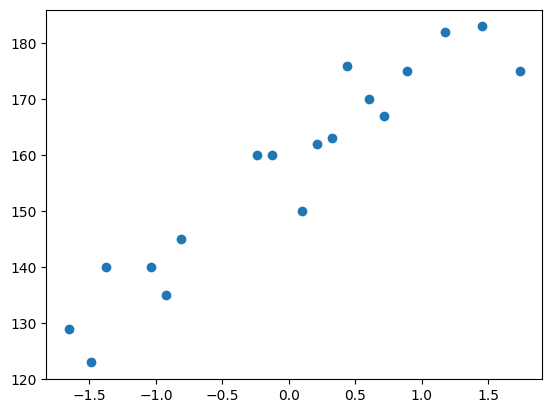

In [13]:
plt.scatter(X_train, y_train)

In [14]:
## Train the Model
from sklearn.linear_model import LinearRegression

In [15]:
regressor = LinearRegression()

In [16]:
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
print("The slope or coeficient of weight is", regressor.coef_)
print("Intercept:", regressor.intercept_)

The slope or coeficient of weight is [17.03440872]
Intercept: 157.5


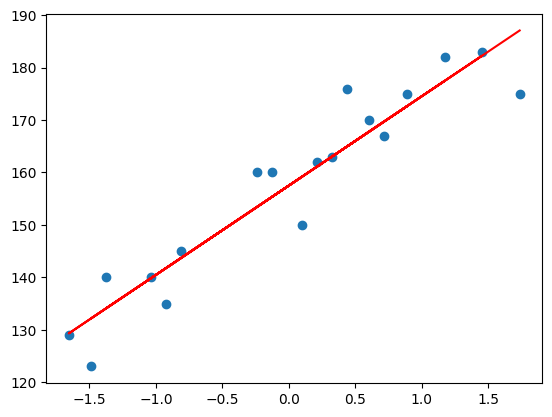

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

### prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

### prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [19]:
y_pred_test = regressor.predict(X_test)

In [20]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

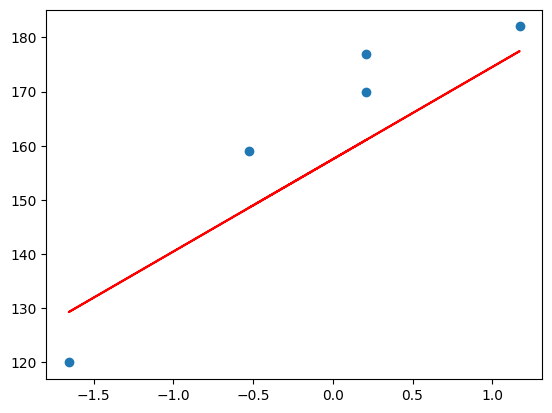

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

## Performance Metrics
## MSE, MAE, RMSE
# R square and ajusted R SQaure

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


### R Square 

In [24]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [25]:
score

0.776986986042344

### Adjusted R Square 

In [26]:
# display ajdusted R-Squared
1 - (1-score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.7026493147231252

In [27]:
regressor

LinearRegression()

In [28]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

/Users/fahdmohammed/Desktop/workspace/lifecycle-ml/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [30]:
scaled_weight[0]

array([0.32350772])

In [31]:
print("The height prediction for weight 80kg is:",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is: [163.01076266]


## Assumptions to the the Model is performing well.
## Plot a Scatter Plot for the prediction


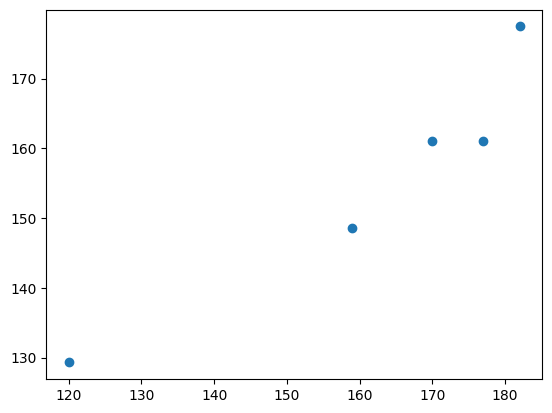

In [32]:
plt.scatter(y_test, y_pred_test)


When there's is a linear relationship between predicted and actual targets, then the model is performing well

## Residuals


In [33]:
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

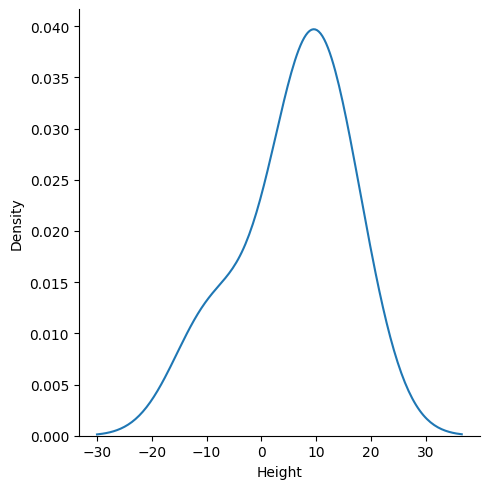

In [34]:
## plot this residuals
import seaborn as sns
sns.displot(residuals,kind='kde')

A normal distribution like this shows the model performed well. Even though this graph is a little left skewed.

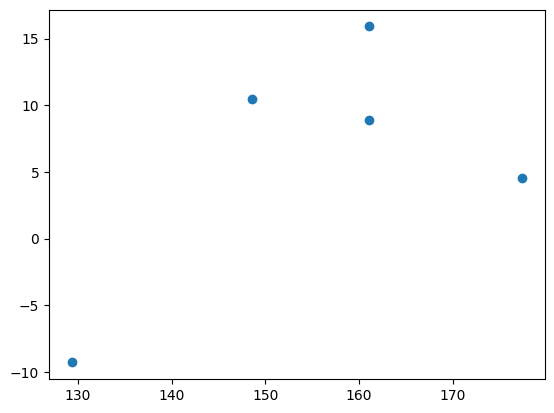

In [35]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test, residuals)

if the result displays a uniform distribution then the model is performing well. 